In [1]:
# Pororo.available_models("collocation")   # 언어지원 확인하기 

In [2]:
# Pororo.available_tasks()

In [5]:
# !pwd

In [6]:
# test_k

In [2]:
# from ourPORORO.pororo.pororo import Pororo
from pororo import Pororo
import json
import os
import re

ocr = Pororo(task="ocr", lang="ko")
# img_path = "./source/김광열.jpg"

def image(PATH):
    # 현재 디렉토리의 jpg 파일을 전부 받아온다
    path = PATH
    dir_list = os.listdir(path)
    dir_list_py = [file for file in dir_list if file.endswith('.jpg')]
    
    for i in dir_list_py : 
        img_path = path + i
        mk_json(*save_list(img_path))

def save_list(img_path):
    #이미지 ocr 정보를 리스트로 저장
    test_k = ocr(img_path, detail=True)
    
    #id
    id = 1

    listA=[]
    for i in range(len(test_k['bounding_poly'])):
        #text
        text = test_k['bounding_poly'][i]['description']
        # box
        position=test_k["bounding_poly"][i]["vertices"]
        all_x=[data['x'] for data in position]
        all_y=[data['y'] for data in position]
        min_x = min(all_x)
        max_x = max(all_x)
        min_y = min(all_y)
        max_y = max(all_y)

        listA.append({"text":text,"box":[min_x,min_y,max_x,max_y],"label":" ","id":id})

        id+=1
    
    return (listA, img_path)

def mk_json(listA, img_path):
    #ocr 정보를 json 파일로 저장한다. 
    name = re.split('[.,/]',img_path)[3]
    with open(f'./Data/{name}.json','w',encoding='UTF-8-sig') as make_file :
        json.dump(listA,make_file,ensure_ascii=False,indent="\t")

# 참고 사이트 https://www.python2.net/questions-556306.htm

In [3]:
image("./source/")

/home/pbl/.local/lib/python3.6/site-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


./Data/김광열.json ./source/김광열.jpg


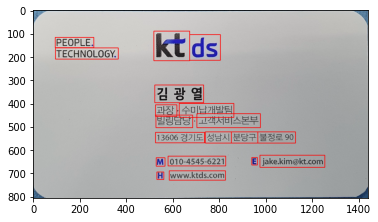

In [4]:
from bbox_display import load_display
load_display(img_filename = '김광열')

In [4]:
# import json
# # import o
# import re
# from pororo import Pororo
# ocr = Pororo(task="ocr", lang="ko")
# ner = Pororo(task="ner", lang="ko")